In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pynance as pn
import numpy as np

## Load the data

In [11]:
# Define the stock tickers and file paths
tickers = ['AAPL', 'AMZN', 'GOOG', 'META', 'MSFT', 'NVDA', 'TSLA']
file_paths = ['../data/AAPL_historical_data.csv', '../data/AMZN_historical_data.csv', '../data/GOOG_historical_data.csv', 
              '../data/META_historical_data.csv', '../data/MSFT_historical_data.csv', '../data/NVDA_historical_data.csv', 
              '../data/TSLA_historical_data.csv']

## Combine the stock data into a single Dateframe

In [72]:
# Initialize an empty list to store DataFrames
stock_data_list = []

# Loop through each file and ticker, loading and appending the data
for ticker, file_path in zip(tickers, file_paths):
    temp_data = pd.read_csv(file_path)
    temp_data['Stock'] = ticker  # Add a 'Stock' column
    temp_data['Date'] = pd.to_datetime(temp_data['Date']).dt.date  # Normalize to date only
    stock_data_list.append(temp_data)

In [70]:
# Combine all stock data into a single DataFrame
stock_data = pd.concat(stock_data_list, ignore_index=True)
stock_data.head()



,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Stock,date
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,AAPL,1980-12-12
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,AAPL,1980-12-15
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,AAPL,1980-12-16
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,AAPL,1980-12-17
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,AAPL,1980-12-18


## Load the news data

In [14]:
# Load the news data
news_data = pd.read_csv('../data/raw_analyst_ratings.csv')

In [15]:
news_data.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [30]:
# Convert the 'Date' column to datetime format, inferring format, and normalize to date only
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce', infer_datetime_format=True).dt.date

C:\Users\NurselamHussen-ZOAEt\AppData\Local\Temp\ipykernel_16584\580530226.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce', infer_datetime_format=True).dt.date


In [31]:
# Drop rows with invalid date conversions
news_data = news_data.dropna(subset=['date'])
# Reanme the stock data Date column value to the date
stock_data = stock_data.rename(columns={'Date': 'date'})

In [32]:
print(stock_data.columns)
print(news_data.columns)

Index(['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'Stock'],
      dtype='object')
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [33]:
stock_data = stock_data.sort_values(by='date')
news_data = news_data.sort_values(by='date')

In [37]:
print("News Data Columns:")
print(news_data.columns)

print("Stock Data Columns:")
print(stock_data.columns)

News Data Columns:
Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')
Stock Data Columns:
Index(['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits', 'Stock'],
      dtype='object')


In [73]:
# change the stock_data column from Stock to stock
stock_data = stock_data.rename(columns={'Stock': 'stock'})

In [41]:
# Merge the news data with the stock data
merged_data = pd.merge(news_data, stock_data, on=['date', 'stock'], how='inner')

In [40]:
# Display the first few rows of the merged dataset
print("Merged Data:")
print(merged_data.head())

Merged Data:
   Unnamed: 0                                           headline  \
0      929046  Why BofA Recommends Buying GPU Plays AMD and N...   
1      929047  Cramer Weighs In On Ciena, Harley-Davidson And...   
2      568388  UPDATE: Chinese Government-Linked Hackers Rece...   
3      568385  CNBC Publishes Article Titled: States are Lean...   
4      568386  Congress Is Stepping Up Its Efforts To Kill Pa...   

                                                 url          publisher  \
0  https://www.benzinga.com/analyst-ratings/analy...   Shanthi Rexaline   
1  https://www.benzinga.com/media/20/06/16156600/...        Craig Jones   
2  https://www.benzinga.com/news/20/06/16182477/u...  Benzinga Newsdesk   
3  https://www.benzinga.com/news/20/06/16192444/c...      Luke J Jacobi   
4  https://www.benzinga.com/fintech/20/06/1594720...     Spencer Israel   

         date stock       Open       High        Low      Close  Adj Close  \
0  2020-06-02  NVDA   8.796250   8.837250   8.658

## Calculate sentiment

In [42]:
from textblob import TextBlob
import nltk

In [43]:
# Download necessary NLTK data (if not already downloaded)
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\NurselamHussen-
[nltk_data]     ZOAEt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [45]:
# Function to calculate sentiment
def get_sentiment(headline):
    return TextBlob(headline).sentiment.polarity

# Apply the function to the 'Headline' column
merged_data['Sentiment'] = merged_data['headline'].apply(get_sentiment)

In [47]:
# Display the first few rows with the sentiment scores
print("Data with Sentiment Scores:")
print(merged_data[['date', 'stock', 'headline', 'Sentiment']].head(25))

Data with Sentiment Scores:
          date stock                                           headline  \
0   2020-06-02  NVDA  Why BofA Recommends Buying GPU Plays AMD and N...   
1   2020-06-02  NVDA  Cramer Weighs In On Ciena, Harley-Davidson And...   
2   2020-06-04  GOOG  UPDATE: Chinese Government-Linked Hackers Rece...   
3   2020-06-05  GOOG  CNBC Publishes Article Titled: States are Lean...   
4   2020-06-05  GOOG  Congress Is Stepping Up Its Efforts To Kill Pa...   
5   2020-06-05  GOOG  Twitter Takes Down Trump Campaign's Video Trib...   
6   2020-06-08  GOOG  Starting This Week, Testing Center Alerts Will...   
7   2020-06-08  NVDA                Afternoon Market Stats in 5 Minutes   
8   2020-06-08  NVDA                  Morning Market Stats in 5 Minutes   
9   2020-06-08  NVDA  Shares of some technology companies are tradin...   
10  2020-06-09  AMZN  IRS Alerts Against Criminals Profiteering From...   
11  2020-06-09  AMZN  'Inside Amazon's plan to test warehouse worker... 

## Daily returns for the stock prices

In [48]:
# Calculate daily returns for the stock prices
merged_data['Daily_Return'] = merged_data['Close'].pct_change()
# pct_change() computes the percentage change between the current and previous day's closing prices.

In [49]:
# Since pct_change() will create NaN for the first row, we can drop those rows
merged_data = merged_data.dropna(subset=['Daily_Return'])

## Display the data with daily returns

In [52]:
# Display the data with daily returns
print("Data with Daily Returns:")
print(merged_data[['date', 'stock', 'Close', 'Daily_Return']].head())

Data with Daily Returns:
         date stock      Close  Daily_Return
1  2020-06-02  NVDA   8.825250      0.000000
2  2020-06-04  GOOG  70.609001      7.000794
3  2020-06-05  GOOG  71.919502      0.018560
4  2020-06-05  GOOG  71.919502      0.000000
5  2020-06-05  GOOG  71.919502      0.000000


## Correlation between sentiment and daily returns

In [53]:
# Calculate the correlation between sentiment and daily returns
correlation = merged_data['Sentiment'].corr(merged_data['Daily_Return'])

# Display the correlation
print(f"Correlation between Sentiment and Daily Returns: {correlation:.4f}")

Correlation between Sentiment and Daily Returns: -0.1990


## Daily stock returns

In [58]:
# Calculate daily stock returns
merged_data['Stock_Return'] = merged_data.groupby('stock')['Close'].pct_change()

# Drop rows with NaN values in 'Stock_Return'
merged_data = merged_data.dropna(subset=['Stock_Return'])

# Check the DataFrame
print(merged_data[['date', 'headline', 'Sentiment', 'Stock_Return']].head())

         date                                           headline  Sentiment  \
3  2020-06-05  CNBC Publishes Article Titled: States are Lean...   0.000000   
4  2020-06-05  Congress Is Stepping Up Its Efforts To Kill Pa...   0.000000   
5  2020-06-05  Twitter Takes Down Trump Campaign's Video Trib...  -0.155556   
6  2020-06-08  Starting This Week, Testing Center Alerts Will...   0.139394   
7  2020-06-08                Afternoon Market Stats in 5 Minutes   0.000000   

   Stock_Return  
3      0.018560  
4      0.000000  
5      0.000000  
6      0.005715  
7     -0.002294  


## plot of Sentiment and Stock returns

In [60]:
print(merged_data.columns)

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock', 'Open',
       'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Dividends',
       'Stock Splits', 'Sentiment', 'Daily_Return', 'Stock_Return'],
      dtype='object')


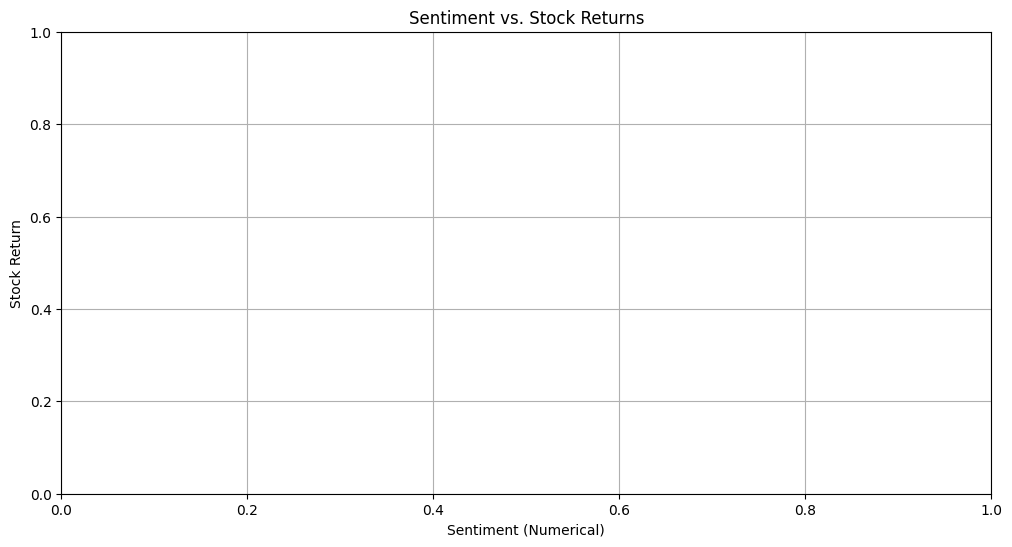

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'Sentiment' to numerical values for better visualization

# Apply the mapping to the DataFrame using .loc
merged_data.loc[:, 'Sentiment_Num'] = merged_data['Sentiment'].map(sentiment_mapping)

# Scatter plot of Sentiment vs. Stock Returns
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sentiment_Num', y='Stock_Return', data=merged_data, hue='Sentiment', palette='coolwarm')
plt.title('Sentiment vs. Stock Returns')
plt.xlabel('Sentiment (Numerical)')
plt.ylabel('Stock Return')
plt.grid(True)
plt.show()

## Plot of Sentiment counts over time

C:\Users\NurselamHussen-ZOAEt\AppData\Local\Temp\ipykernel_16584\3001332688.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['date'] = pd.to_datetime(merged_data['date'])


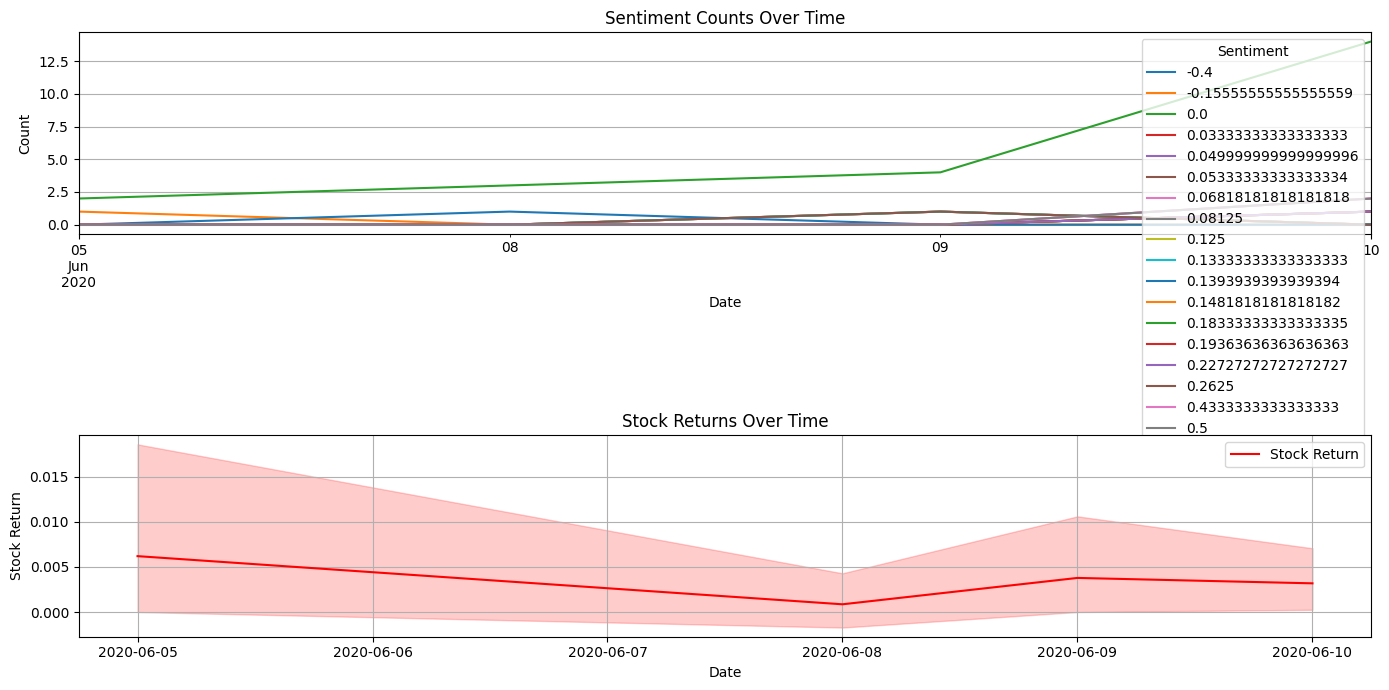

In [63]:
# Convert 'date' to datetime for plotting
# merged_data['date'] = pd.to_datetime(merged_data['date'])

merged_data.loc[:, 'date'] = pd.to_datetime(merged_data['date'])

# Plotting sentiment counts over time
plt.figure(figsize=(14, 7))

# Plot Sentiment Count
plt.subplot(2, 1, 1)
sentiment_counts = merged_data.groupby(['date', 'Sentiment']).size().unstack().fillna(0)
sentiment_counts.plot(ax=plt.gca(), kind='line')
plt.title('Sentiment Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid(True)

# Plot Stock Returns
plt.subplot(2, 1, 2)
sns.lineplot(x='date', y='Stock_Return', data=merged_data, label='Stock Return', color='red')
plt.title('Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Return')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

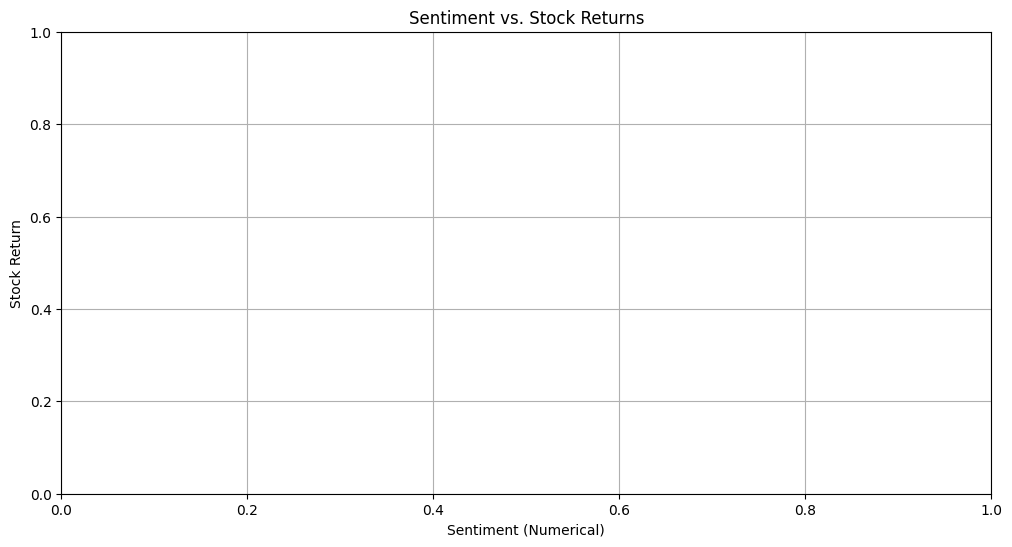

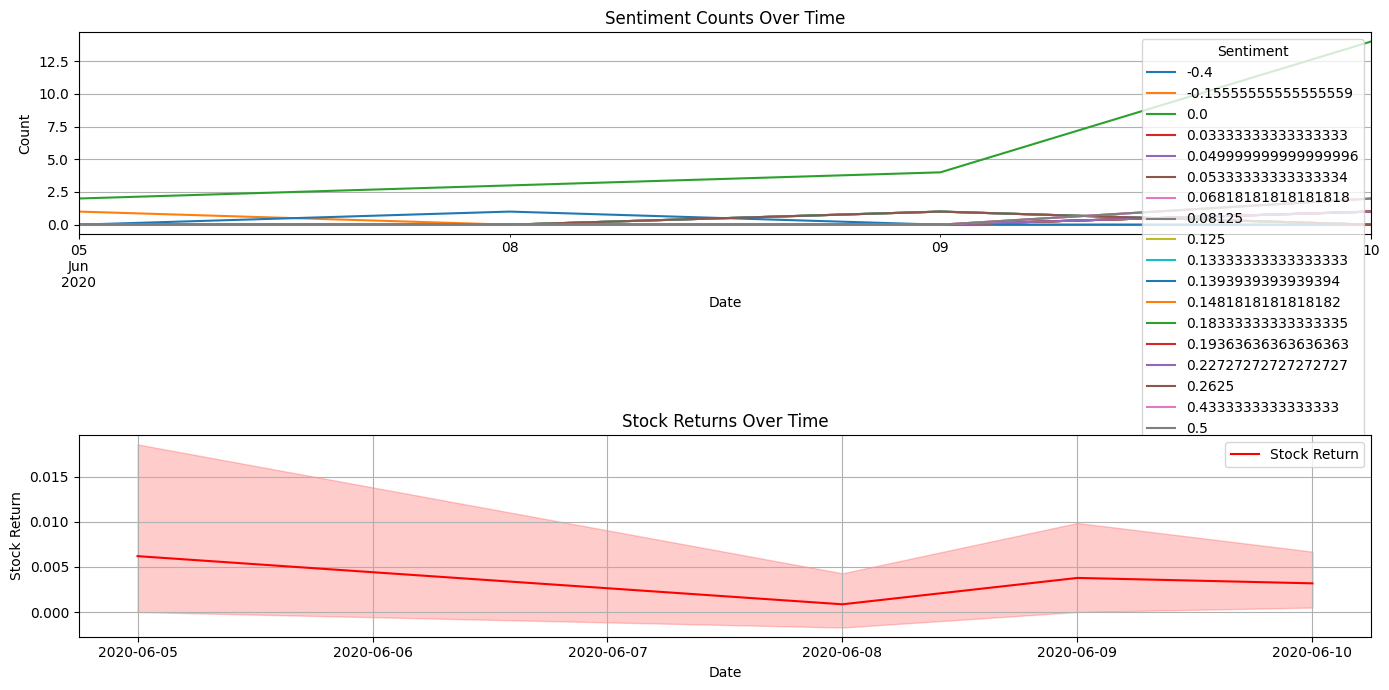

In [64]:
merged_data.loc[:, 'date'] = pd.to_datetime(merged_data['date'])

# Convert 'Sentiment' to numerical values for visualization
sentiment_mapping = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
merged_data.loc[:, 'Sentiment_Num'] = merged_data['Sentiment'].map(sentiment_mapping)

# Convert 'date' to datetime format
merged_data.loc[:, 'date'] = pd.to_datetime(merged_data['date'])

# Scatter plot of Sentiment vs. Stock Returns
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Sentiment_Num', y='Stock_Return', data=merged_data, hue='Sentiment', palette='coolwarm')
plt.title('Sentiment vs. Stock Returns')
plt.xlabel('Sentiment (Numerical)')
plt.ylabel('Stock Return')
plt.grid(True)
plt.show()

# Plotting sentiment counts over time
plt.figure(figsize=(14, 7))

# Plot Sentiment Count
plt.subplot(2, 1, 1)
sentiment_counts = merged_data.groupby(['date', 'Sentiment']).size().unstack().fillna(0)
sentiment_counts.plot(ax=plt.gca(), kind='line')
plt.title('Sentiment Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid(True)

# Plot Stock Returns
plt.subplot(2, 1, 2)
sns.lineplot(x='date', y='Stock_Return', data=merged_data, label='Stock Return', color='red')
plt.title('Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Return')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

## Plot of the average sentiment score

In [66]:

# Group by 'date' and calculate the average sentiment score
daily_sentiment = merged_data.groupby('date')['Sentiment_Num'].mean().reset_index()
daily_sentiment.rename(columns={'Sentiment_Num': 'Avg_Sentiment'}, inplace=True)

# Display the first few rows to verify
print(daily_sentiment.head())

        date  Avg_Sentiment
0 2020-06-05            NaN
1 2020-06-08            NaN
2 2020-06-09            NaN
3 2020-06-10            NaN


## Daily returns

In [67]:

# Group stock data by date and calculate daily returns
daily_stock_returns = merged_data.groupby('date')['Stock_Return'].mean().reset_index()
daily_stock_returns.rename(columns={'Stock_Return': 'Avg_Stock_Return'}, inplace=True)

# Merge average daily sentiment with stock returns
combined_data = pd.merge(daily_sentiment, daily_stock_returns, on='date', how='inner')

# Display the first few rows to verify
print(combined_data.head())

        date  Avg_Sentiment  Avg_Stock_Return
0 2020-06-05            NaN          0.006187
1 2020-06-08            NaN          0.000855
2 2020-06-09            NaN          0.003775
3 2020-06-10            NaN          0.003176


## Pearson correlation coefficent

In [68]:
# Calculate Pearson correlation coefficient
correlation = combined_data[['Avg_Sentiment', 'Avg_Stock_Return']].corr().iloc[0, 1]

print(f'Pearson Correlation Coefficient: {correlation:.2f}')

Pearson Correlation Coefficient: nan


## Average Sentiment and Average Stock Returns

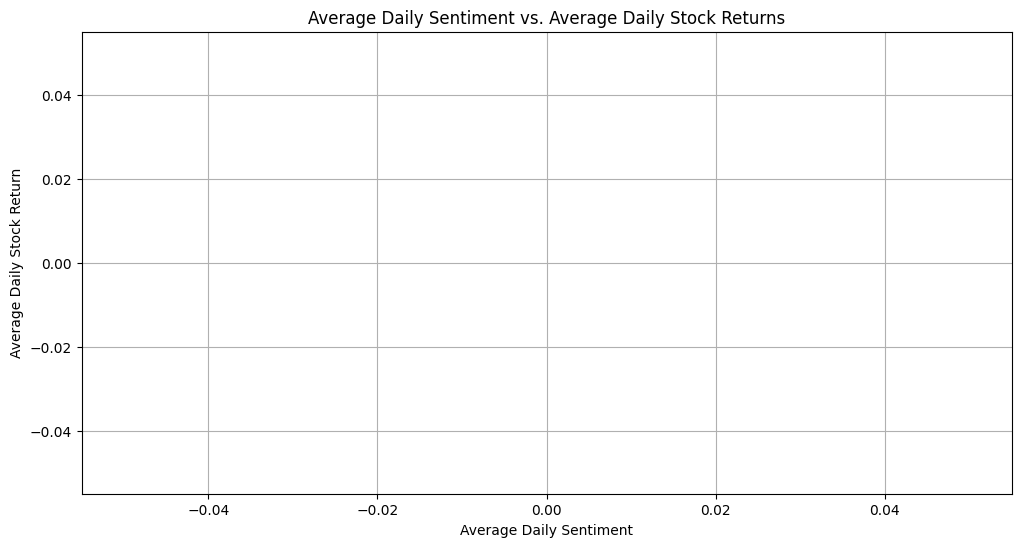

In [69]:
# Scatter plot of Average Sentiment vs. Average Stock Returns
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Avg_Sentiment', y='Avg_Stock_Return', data=combined_data)
plt.title('Average Daily Sentiment vs. Average Daily Stock Returns')
plt.xlabel('Average Daily Sentiment')
plt.ylabel('Average Daily Stock Return')
plt.grid(True)
plt.show()